# 1D Burgers’ Equation (Finite Difference Method)

**Schemes**
- Convection term: Backward difference
- Diffusion term: Central difference  
- Boundary condition: Periodic

We compute:
1. Initial condition from the analytical (Cole–Hopf) form using SymPy
2. Numerical solution via finite differences
3. Analytical solution for comparison


In [2]:
import numpy as np
import sympy as sp
from sympy.utilities.lambdify import lambdify
from matplotlib import pyplot as plt

sp.init_printing(use_latex=True)

line = "-" * 48

print("Solving 1D Burgers Equation using Finite Difference Method")
print("Convection Term: Backward Difference Scheme")
print("Diffusion Term: Central Difference Scheme\n")


Solving 1D Burgers Equation using Finite Difference Method
Convection Term: Backward Difference Scheme
Diffusion Term: Central Difference Scheme



Symbolic definition of $\phi$  and initial condition u

In [3]:
x, nu_sym, t = sp.symbols('x nu t')

phi = (
    sp.exp(-(x - 4*t)**2/(4*nu_sym*(t + 1))) 
    + sp.exp(-(x - 4*t - 2*sp.pi)**2/(4*nu_sym*(t + 1)))
)

print(line)
print("printing phi expression")
print(line)
print(phi)

phiprime = phi.diff(x)

u_expr = -2*nu_sym*(phiprime/phi) + 4

print(line)
print("Initial Condition expression")
print(line)
print(u_expr)

ufunc = lambdify((t, x, nu_sym), u_expr, "numpy")


------------------------------------------------
printing phi expression
------------------------------------------------
exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))
------------------------------------------------
Initial Condition expression
------------------------------------------------
-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


In [4]:
# grid setup + initial condition array
nx = 101
nt = 20
dx = 2*np.pi / (nx - 1)
nu = 0.07
dt = dx * nu

x = np.linspace(0, 2*np.pi, nx)
un = np.empty(nx)
t0 = 0

u = np.asarray([ufunc(t0, x0, nu) for x0 in x], dtype=float)

print(line)
print("Computing Initial Solution")
print(line)
print(u)


------------------------------------------------
Computing Initial Solution
------------------------------------------------
[4.         4.06283185 4.12566371 4.18849556 4.25132741 4.31415927
 4.37699112 4.43982297 4.50265482 4.56548668 4.62831853 4.69115038
 4.75398224 4.81681409 4.87964594 4.9424778  5.00530965 5.0681415
 5.13097336 5.19380521 5.25663706 5.31946891 5.38230077 5.44513262
 5.50796447 5.57079633 5.63362818 5.69646003 5.75929189 5.82212374
 5.88495559 5.94778745 6.0106193  6.07345115 6.136283   6.19911486
 6.26194671 6.32477856 6.38761042 6.45044227 6.51327412 6.57610598
 6.63893783 6.70176967 6.76460125 6.82742866 6.89018589 6.95176632
 6.99367964 6.72527549 4.         1.27472451 1.00632036 1.04823368
 1.10981411 1.17257134 1.23539875 1.29823033 1.36106217 1.42389402
 1.48672588 1.54955773 1.61238958 1.67522144 1.73805329 1.80088514
 1.863717   1.92654885 1.9893807  2.05221255 2.11504441 2.17787626
 2.24070811 2.30353997 2.36637182 2.42920367 2.49203553 2.55486738
 2.61

------------------------------------------------
Plotting Initial Solution
------------------------------------------------


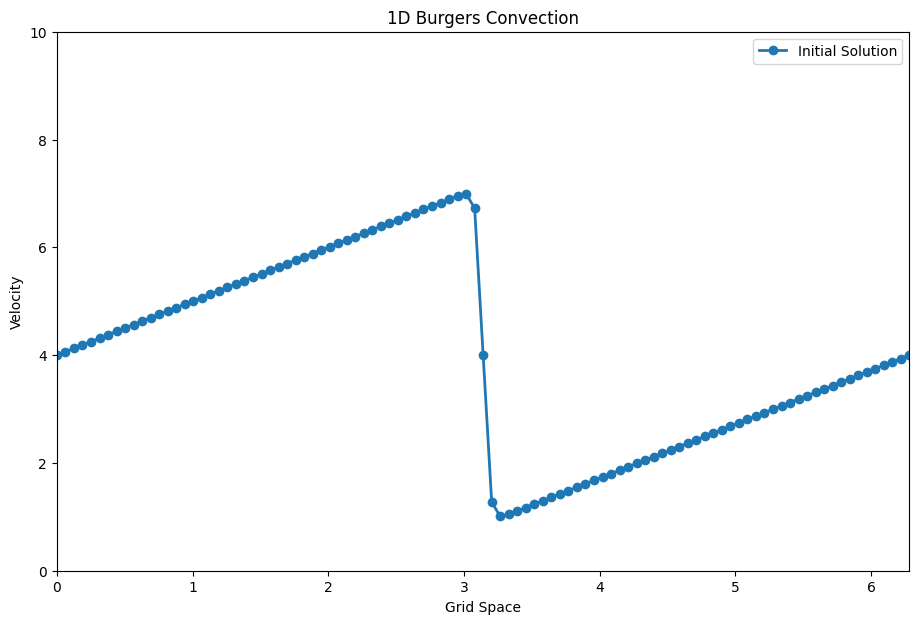

In [5]:
#Plot initial solution
print(line)
print("Plotting Initial Solution")
print(line)

plt.figure(figsize=(11, 7), dpi=100)
plt.plot(x, u, marker='o', lw=2, label='Initial Solution')
plt.title('1D Burgers Convection')
plt.xlabel('Grid Space')
plt.ylabel('Velocity')
plt.xlim([0, 2*np.pi])
plt.ylim([0, 10])
plt.legend()
plt.show()


In [6]:
#Compute analytical solution at final time
print(line)
print("Computing Analytical Solution")
print(line)

u_analytical = np.asarray([ufunc(nt*dt, xi, nu) for xi in x], dtype=float)

print(line)
print("Printing Analytical Solution")
print(line)
print(u_analytical)


------------------------------------------------
Computing Analytical Solution
------------------------------------------------
------------------------------------------------
Printing Analytical Solution
------------------------------------------------
[3.67659023 3.73434198 3.79209372 3.84984546 3.90759721 3.96534895
 4.0231007  4.08085244 4.13860419 4.19635593 4.25410767 4.31185942
 4.36961116 4.42736291 4.48511465 4.5428664  4.60061814 4.65836989
 4.71612163 4.77387337 4.83162512 4.88937686 4.94712861 5.00488035
 5.0626321  5.12038384 5.17813558 5.23588733 5.29363907 5.35139082
 5.40914256 5.46689431 5.52464605 5.58239779 5.64014954 5.69790128
 5.75565303 5.81340477 5.87115652 5.92890826 5.98666    6.04441175
 6.10216349 6.15991524 6.21766698 6.27541873 6.33317047 6.39092221
 6.44867394 6.50642549 6.56417458 6.62189086 6.67916901 6.73060339
 6.70529246 5.84605874 2.64731692 1.34264158 1.26247621 1.30962834
 1.36658484 1.42427702 1.48202431 1.53977572 1.59752744 1.65527918
 1.71303

In [7]:
# Time marching (numerical solution)
print(line)
print("Calculating Numerical Solution......")
print(line)

for n in range(nt):                 # time marching
    un = u.copy()
    for i in range(1, nx - 1):      # space marching
        
        # Backward difference (convection) + central difference (diffusion)
        u[i] = un[i] - un[i]*dt/dx*(un[i] - un[i-1]) + nu*dt/dx**2*(un[i+1] - 2*un[i] + un[i-1])

    # periodic boundary condition
    u[0]  = un[0] - un[0]*dt/dx*(un[0] - un[-2]) + nu*dt/dx**2*(un[1] - 2*un[0] + un[-2])
    u[-1] = u[0]

print(line)
print("Printing Numerical Solution......")
print(line)
print(u)


------------------------------------------------
Calculating Numerical Solution......
------------------------------------------------
------------------------------------------------
Printing Numerical Solution......
------------------------------------------------
[3.67532982 3.73306176 3.79079371 3.84852565 3.9062576  3.96398954
 4.02172149 4.07945344 4.13718538 4.19491733 4.25264927 4.31038122
 4.36811316 4.42584511 4.48357706 4.541309   4.59904095 4.65677289
 4.71450484 4.77223678 4.82996873 4.88770068 4.94543262 5.00316457
 5.06089651 5.11862846 5.1763604  5.23409235 5.2918243  5.34955624
 5.40728819 5.46502013 5.52275208 5.58048402 5.63821597 5.69594792
 5.75367986 5.81141181 5.86914375 5.9268757  5.98460764 6.04233956
 6.10007133 6.15780232 6.21552949 6.27323941 6.33087682 6.38822961
 6.44453295 6.49717912 6.53771303 6.5400072  6.4278706  6.00185905
 4.88330252 3.07475131 1.80201144 1.36831767 1.29191525 1.3173231
 1.36786538 1.42411915 1.48157232 1.53925643 1.59698095 1.654711

------------------------------------------------
Plotting Initial, Analytical & Numerical Solution
------------------------------------------------


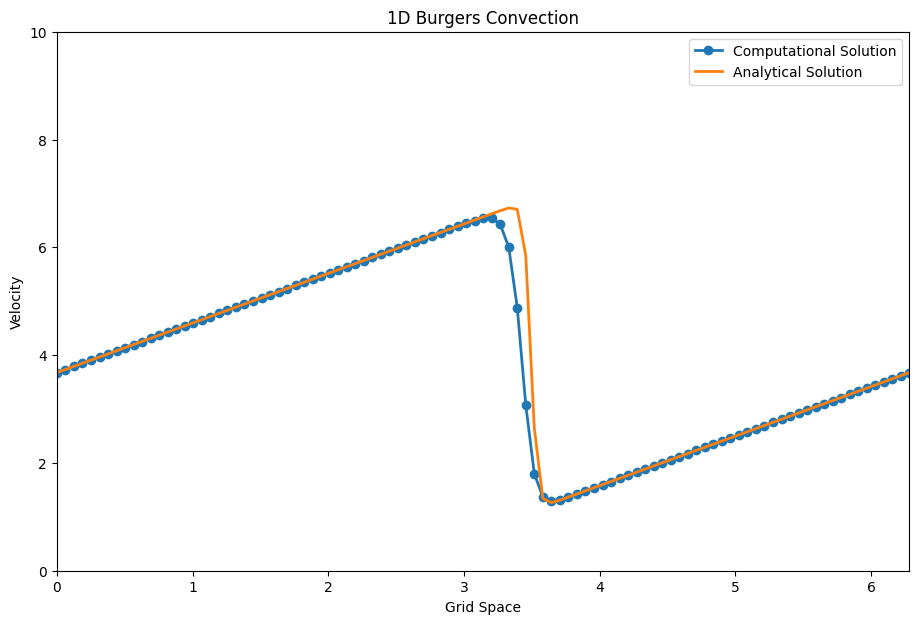

In [8]:
# Plot numerical vs analytical
print(line)
print("Plotting Initial, Analytical & Numerical Solution")
print(line)

plt.figure(figsize=(11, 7), dpi=100)
plt.plot(x, u, marker='o', lw=2, label='Computational Solution')
plt.plot(x, u_analytical, lw=2, label='Analytical Solution')
plt.xlim([0, 2*np.pi])
plt.ylim([0, 10])
plt.title('1D Burgers Convection')
plt.xlabel('Grid Space')
plt.ylabel('Velocity')
plt.legend()
plt.show()
